In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

sc.settings.verbosity = 3

In [2]:
data = pd.read_table("../../Melanoma/GSE72056_melanoma_single_cell_revised_v2.txt", header=0)
def dedup(x):
    d = {}
    r = []
    for i in x:
        if i in d:
            d[i] += 1
            r.append(i + '_' + str(d[i]))
            print(i, 'renamed to', r[-1])
        else:
            d[i] = 1
            r.append(i)
    return r

data['Cell'] = dedup(data['Cell'])

data = data.T
data

MARCH2 renamed to MARCH2_2
MARCH1 renamed to MARCH1_2


,0,1,2,3,4,5,6,7,8,9,...,23679,23680,23681,23682,23683,23684,23685,23686,23687,23688
Cell,tumor,"malignant(1=no,2=yes,0=unresolved)","non-malignant cell type (1=T,2=B,3=Macro.4=End...",C9orf152,RPS11,ELMO2,CREB3L1,PNMA1,MMP2,TMEM216,...,GPLD1,SNORD115-39,RAB8A,RXFP2,PCIF1,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
Cy72_CD45_H02_S758_comb,72,1,2,0,9.2172,0,0,0,0,0,...,0.62667,0,0,0,0,7.6069,0,0,2.6638,0
CY58_1_CD45_B02_S974_comb,58,1,1,0,8.3745,0,0,0,0,0,...,1.0545,0,0,0,0,0,0,0,6.9901,0
Cy71_CD45_D08_S524_comb,71,2,0,0,9.313,2.1263,0,0,0.73812,0,...,0.99639,0,2.7634,0,3.6782,0,3.9871,3.8777,1.6126,0
Cy81_FNA_CD45_B01_S301_comb,81,2,0,0,7.8876,0,0,0,0,0,...,0.23143,0,4.1937,0,0,0,5.2639,3.766,4.8417,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,75,1,1,0,5.4889,0,0,0,0,0,...,1.2962,0,0,0,0,0,6.0986,0,3.6464,0
CY75_1_CD45_CD8_1__S65_comb,75,1,1,0,4.9262,5.5296,0,0,0,0,...,0.99245,0,0,0,5.5465,3.7384,0,0,7.0004,0
CY75_1_CD45_CD8_1__S93_comb,75,1,1,0,7.0958,0,0,0,0,0,...,0.97516,0,0,0,0,0,0,0,1.9615,0
CY75_1_CD45_CD8_1__S76_comb,75,1,1,0,3.997,0,0,0,0,0,...,0.49208,0,0,0,0,0,0,0,7.1918,0


In [3]:
data.columns = data.loc["Cell"]
data.drop('Cell', inplace=True)
data

Cell,tumor,"malignant(1=no,2=yes,0=unresolved)","non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",C9orf152,RPS11,ELMO2,CREB3L1,PNMA1,MMP2,TMEM216,...,GPLD1,SNORD115-39,RAB8A,RXFP2,PCIF1,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
Cy72_CD45_H02_S758_comb,72,1,2,0,9.2172,0,0,0,0,0,...,0.62667,0,0,0,0,7.6069,0,0,2.6638,0
CY58_1_CD45_B02_S974_comb,58,1,1,0,8.3745,0,0,0,0,0,...,1.0545,0,0,0,0,0,0,0,6.9901,0
Cy71_CD45_D08_S524_comb,71,2,0,0,9.313,2.1263,0,0,0.73812,0,...,0.99639,0,2.7634,0,3.6782,0,3.9871,3.8777,1.6126,0
Cy81_FNA_CD45_B01_S301_comb,81,2,0,0,7.8876,0,0,0,0,0,...,0.23143,0,4.1937,0,0,0,5.2639,3.766,4.8417,0
Cy80_II_CD45_B07_S883_comb,80,2,0,0,8.3291,0,0,0,0,3.7949,...,0,0,2.5705,0,0,0,6.0824,1.7816,4.4607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,75,1,1,0,5.4889,0,0,0,0,0,...,1.2962,0,0,0,0,0,6.0986,0,3.6464,0
CY75_1_CD45_CD8_1__S65_comb,75,1,1,0,4.9262,5.5296,0,0,0,0,...,0.99245,0,0,0,5.5465,3.7384,0,0,7.0004,0
CY75_1_CD45_CD8_1__S93_comb,75,1,1,0,7.0958,0,0,0,0,0,...,0.97516,0,0,0,0,0,0,0,1.9615,0
CY75_1_CD45_CD8_1__S76_comb,75,1,1,0,3.997,0,0,0,0,0,...,0.49208,0,0,0,0,0,0,0,7.1918,0


In [4]:
obs = data[['tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)']]
data.drop(['tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'], 
          axis=1, inplace=True)
print(data.columns[data.columns.str.startswith('ERCC')], 'dropped')
data = data.loc[:, data.columns.str.startswith('ERCC') == False]

Index(['ERCC5', 'ERCC8', 'ERCC1', 'ERCC4', 'ERCC6L', 'ERCC6L2', 'ERCC3',
       'ERCC6', 'ERCC2'],
      dtype='object', name='Cell') dropped


In [5]:
pd.crosstab(obs['malignant(1=no,2=yes,0=unresolved)'], obs['non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'])

"non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",0.0,1.0,2.0,3.0,4.0,5.0,6.0
"malignant(1=no,2=yes,0=unresolved)",,,,,,,
0.0,90,24,3,6,3,5,1
1.0,416,2040,512,119,62,56,51
2.0,1252,4,0,1,0,0,0


In [6]:
malignant_dict = ['unresolved', 'normal', 'tumor']
celltype_dict = ['NA', 'T', 'B', 'Macro', 'Endo', 'CAF', 'NK']
obs['malignant'] = obs['malignant(1=no,2=yes,0=unresolved)'].astype(int).apply(malignant_dict.__getitem__)
obs['celltype'] = obs['non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'].astype(int).apply(celltype_dict.__getitem__)

/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
adata = sc.AnnData(data)
for i in obs.columns:
    adata.obs[i] = obs[i]
    
del data
adata

AnnData object with n_obs × n_vars = 4645 × 23677
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'malignant', 'celltype'

normalizing counts per cell
    finished (0:00:00)


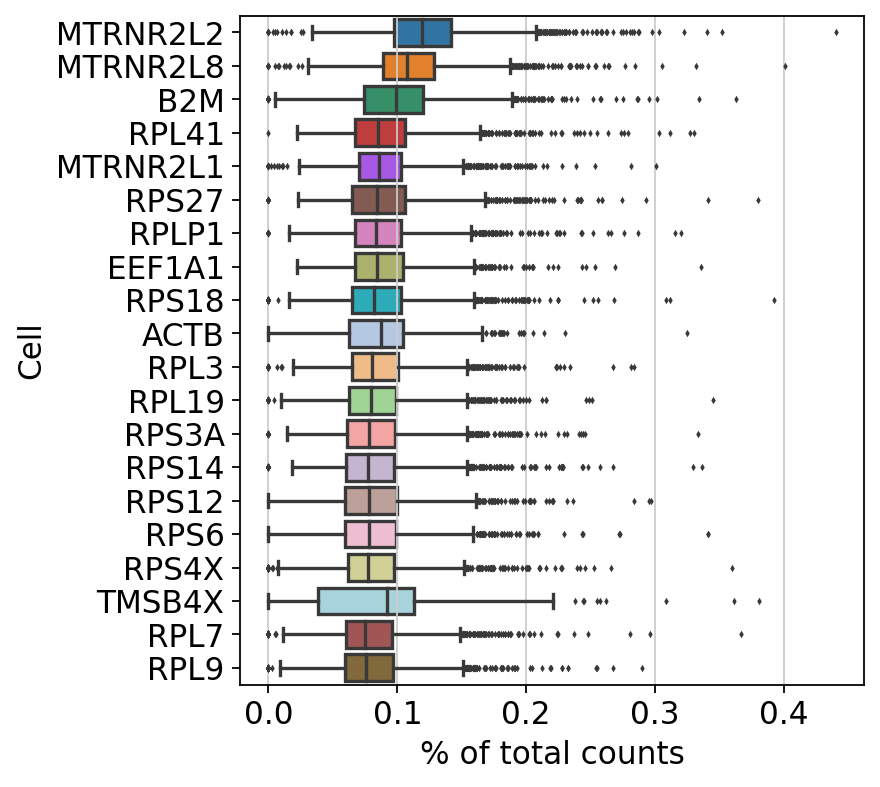

In [8]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'tumor' as categorical
... storing 'malignant(1=no,2=yes,0=unresolved)' as categorical
... storing 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)' as categorical
... storing 'malignant' as categorical
... storing 'celltype' as categorical
/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/shaoheng/min

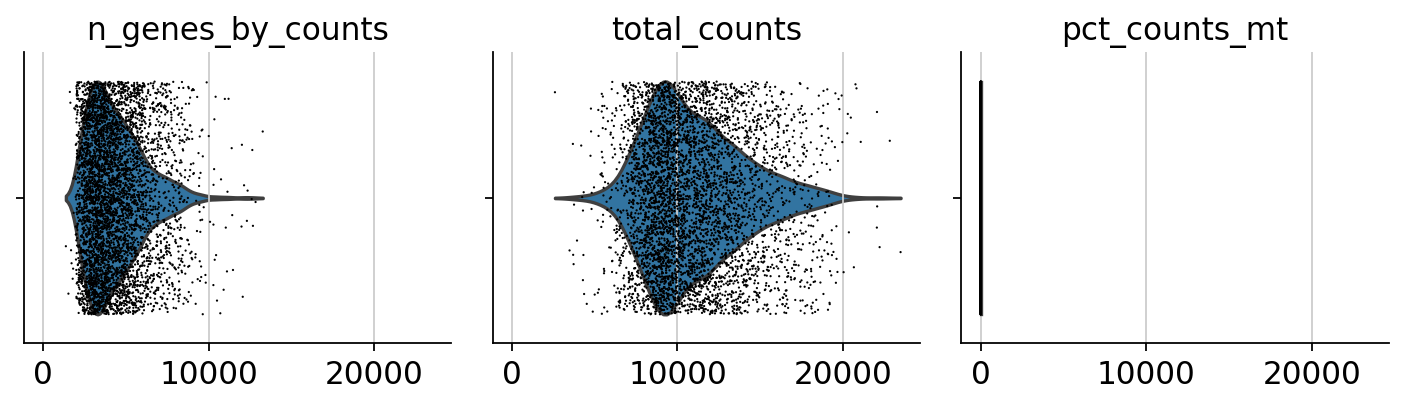

In [9]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

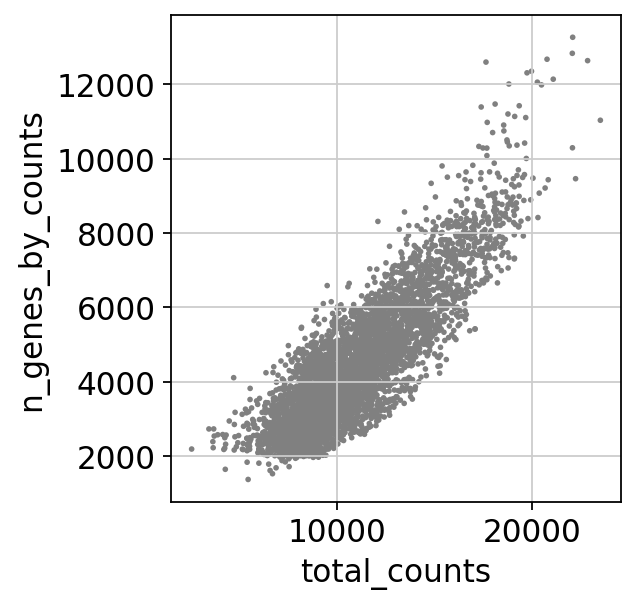

In [10]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 1397 genes that are detected in less than 3 cells


In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


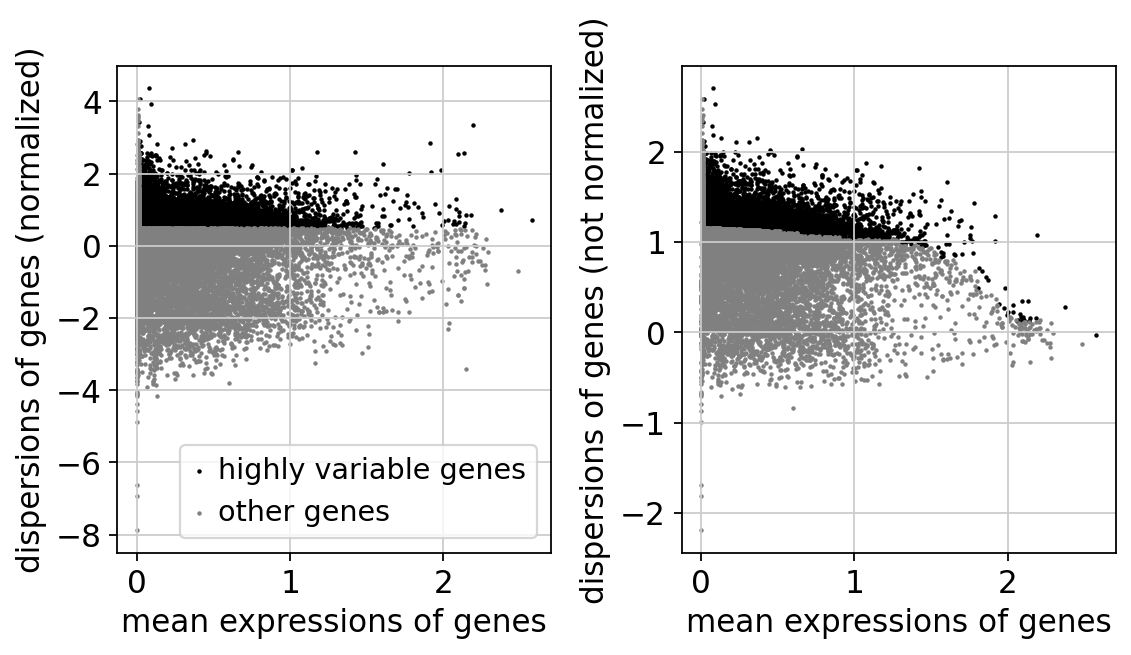

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [15]:
sc.pp.scale(adata, max_value=10)
adata

/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 4645 × 6219
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'malignant', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [16]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


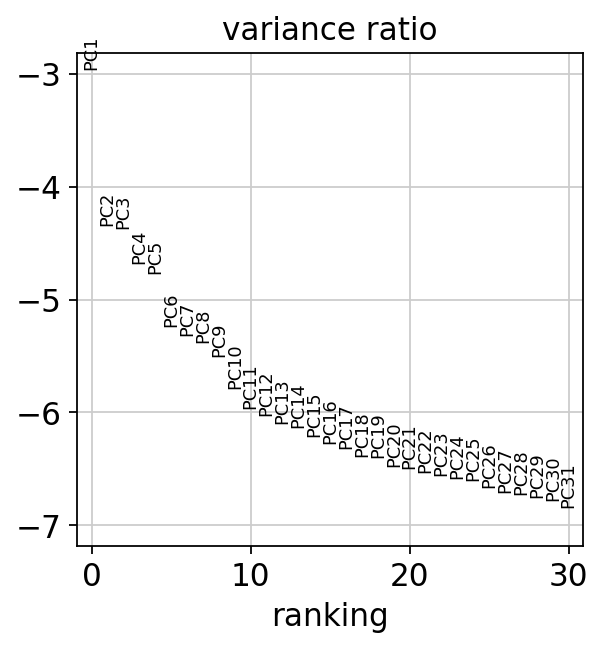

In [17]:
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


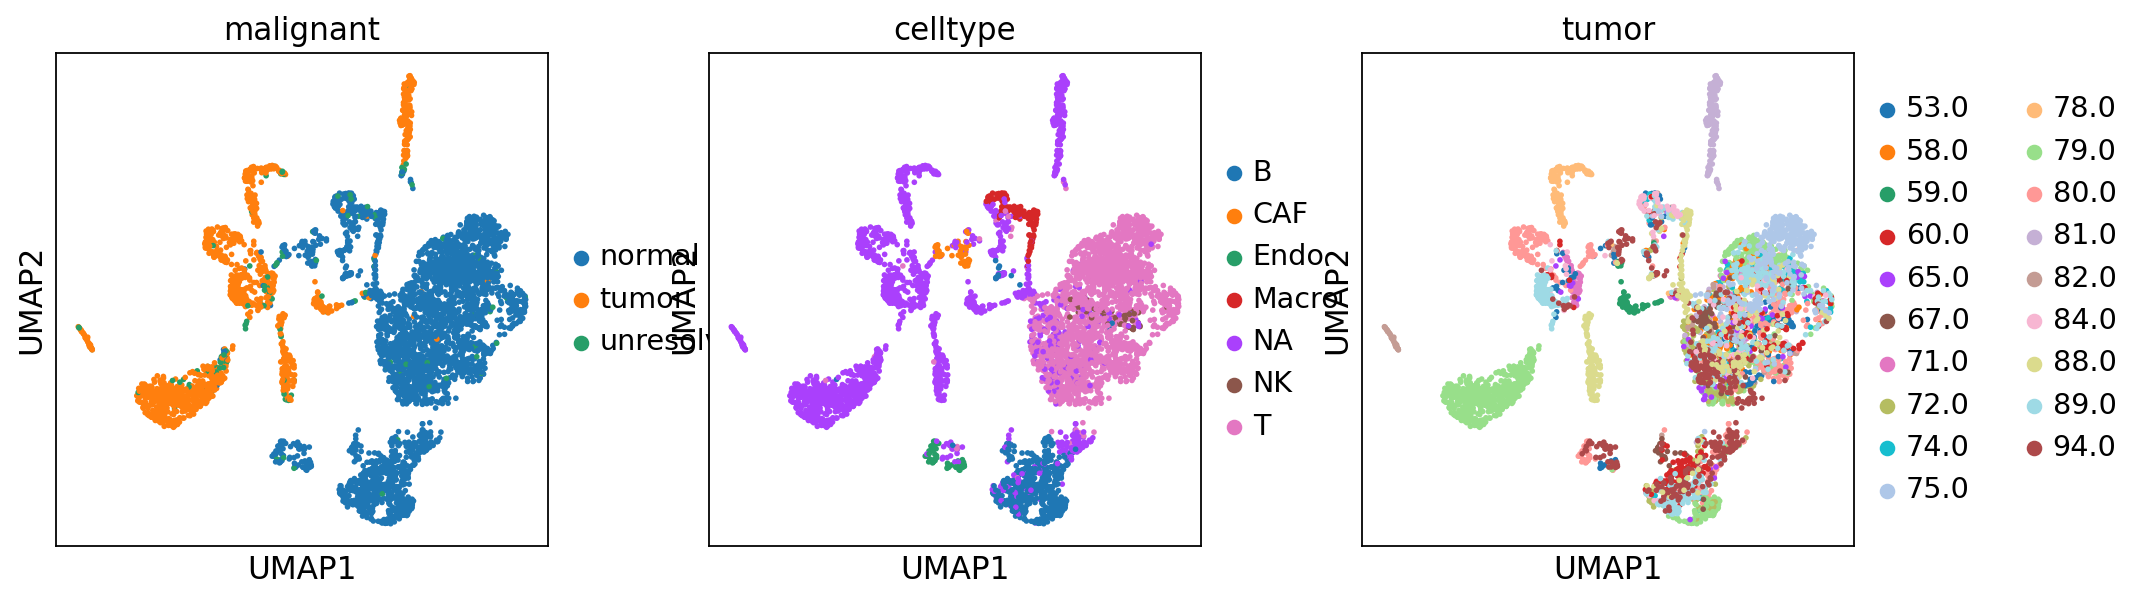

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['malignant', 'celltype', 'tumor'])

In [19]:
import sys
sys.path.insert(0,'..')
import compactmarker._tsne_l1
model = compactmarker._tsne_l1.TsneL1(lasso=1.15e-5, n_pcs=20, perplexity=30., use_beta_in_Q=True, n_threads=4) # , max_inner_iter=1, max_outer_iter=1
model.fit(adata.X)

Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 4 threads...


../compactmarker/_tsne_l1.py:319: RuntimeWarning: invalid value encountered in true_divide
  P = P / sumP
../compactmarker/_tsne_l1.py:319: RuntimeWarning: invalid value encountered in true_divide
  P = P / sumP
../compactmarker/_tsne_l1.py:319: RuntimeWarning: invalid value encountered in true_divide
  P = P / sumP
../compactmarker/_tsne_l1.py:319: RuntimeWarning: invalid value encountered in true_divide
  P = P / sumP


Mean value of sigma: 4.838121
Done. Elapsed time: 34.87 seconds. Total: 34.87 seconds.
Optimizing...
0 loss: 4.84325647354126 Nonzero: 55 Elapsed time: 108.42 seconds. Total: 143.29 seconds.
1 loss: 3.2446529865264893 Nonzero: 52 Elapsed time: 115.92 seconds. Total: 259.21 seconds.
2 loss: 3.228729486465454 Nonzero: 52 Elapsed time: 103.29 seconds. Total: 362.50 seconds.
3 loss: 3.2277963161468506 Nonzero: 52 Elapsed time: 91.33 seconds. Total: 453.83 seconds.
4 loss: 3.2277867794036865 Nonzero: 52 Elapsed time: 37.52 seconds. Total: 491.35 seconds.
final loss: 3.2205188274383545 Nonzero: 52 Elapsed time: 1.48 seconds. Total: 492.83 seconds.


In [20]:
adata.var_names[model.get_mask()]

Index(['CST7', 'B2M', 'SERPINA3', 'BIRC5', 'EFEMP1', 'PTPRC', 'PDCD1',
       'CCL4L1', 'A2M', 'TYR', 'COL1A2', 'CXCL14', 'ELK2AP', 'CXCL12', 'IL7R',
       'CDH5', 'KIT', 'TIMP1', 'CCR7', 'ELTD1', 'CCL4L2', 'ASF1B', 'NKG7',
       'MTRNR2L2', 'GZMA', 'SLCO2B1', 'FOXP3', 'CDK1', 'LGALS2', 'SERPINA1',
       'PMEL', 'HLA-DRB1', 'PRAME', 'CCL14', 'PRF1', 'MIA', 'IL32', 'CD3D',
       'TYROBP', 'CD69', 'FCN1', 'CD8A', 'CPE', 'CX3CR1', 'PLP1', 'TIGIT',
       'CD27', 'MS4A1', 'CSF1R', 'CTLA4', 'TNFRSF4', 'LTB'],
      dtype='object', name='Cell')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


/home/shaoheng/miniconda3/envs/scanpy37/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


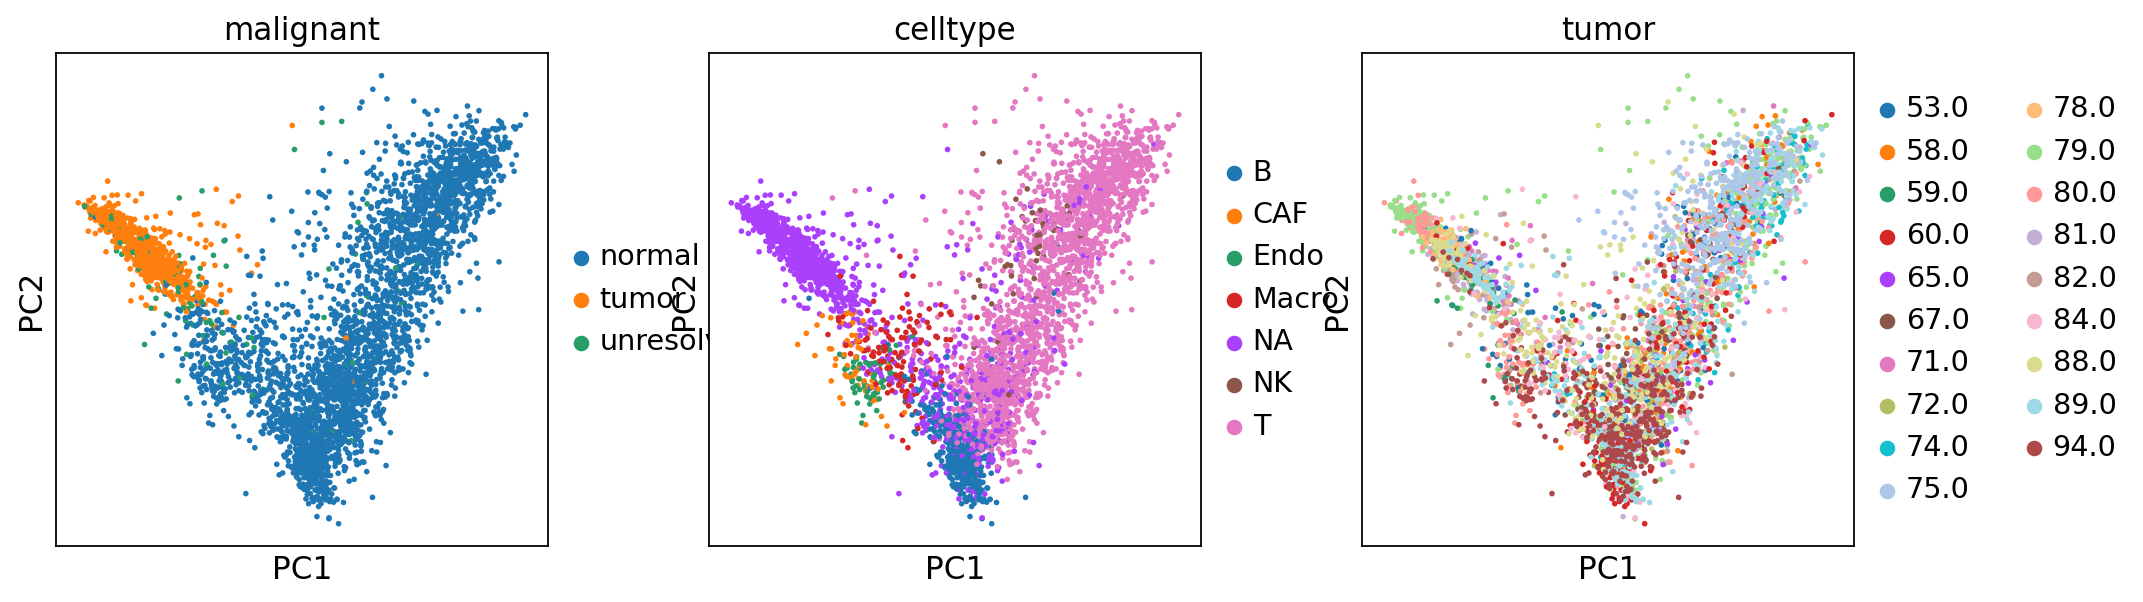

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


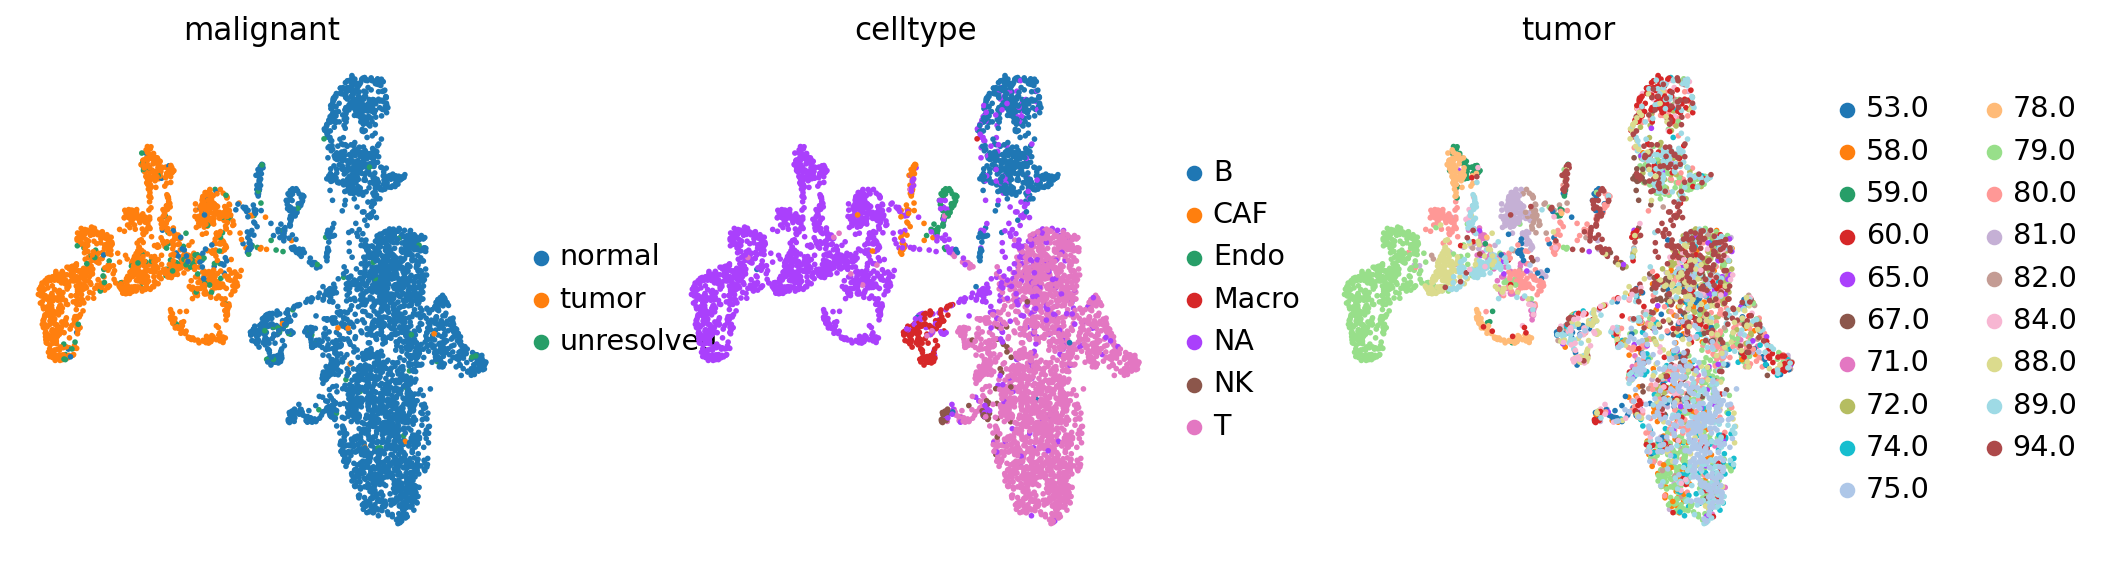

In [21]:
new_adata = model.transform(adata)
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pl.pca(new_adata, color=['malignant', 'celltype', 'tumor'])
sc.pp.neighbors(new_adata, n_pcs=10, use_rep="X_pca")
sc.tl.umap(new_adata)
sc.pl.umap(new_adata, color=['malignant', 'celltype', 'tumor'], frameon=False)

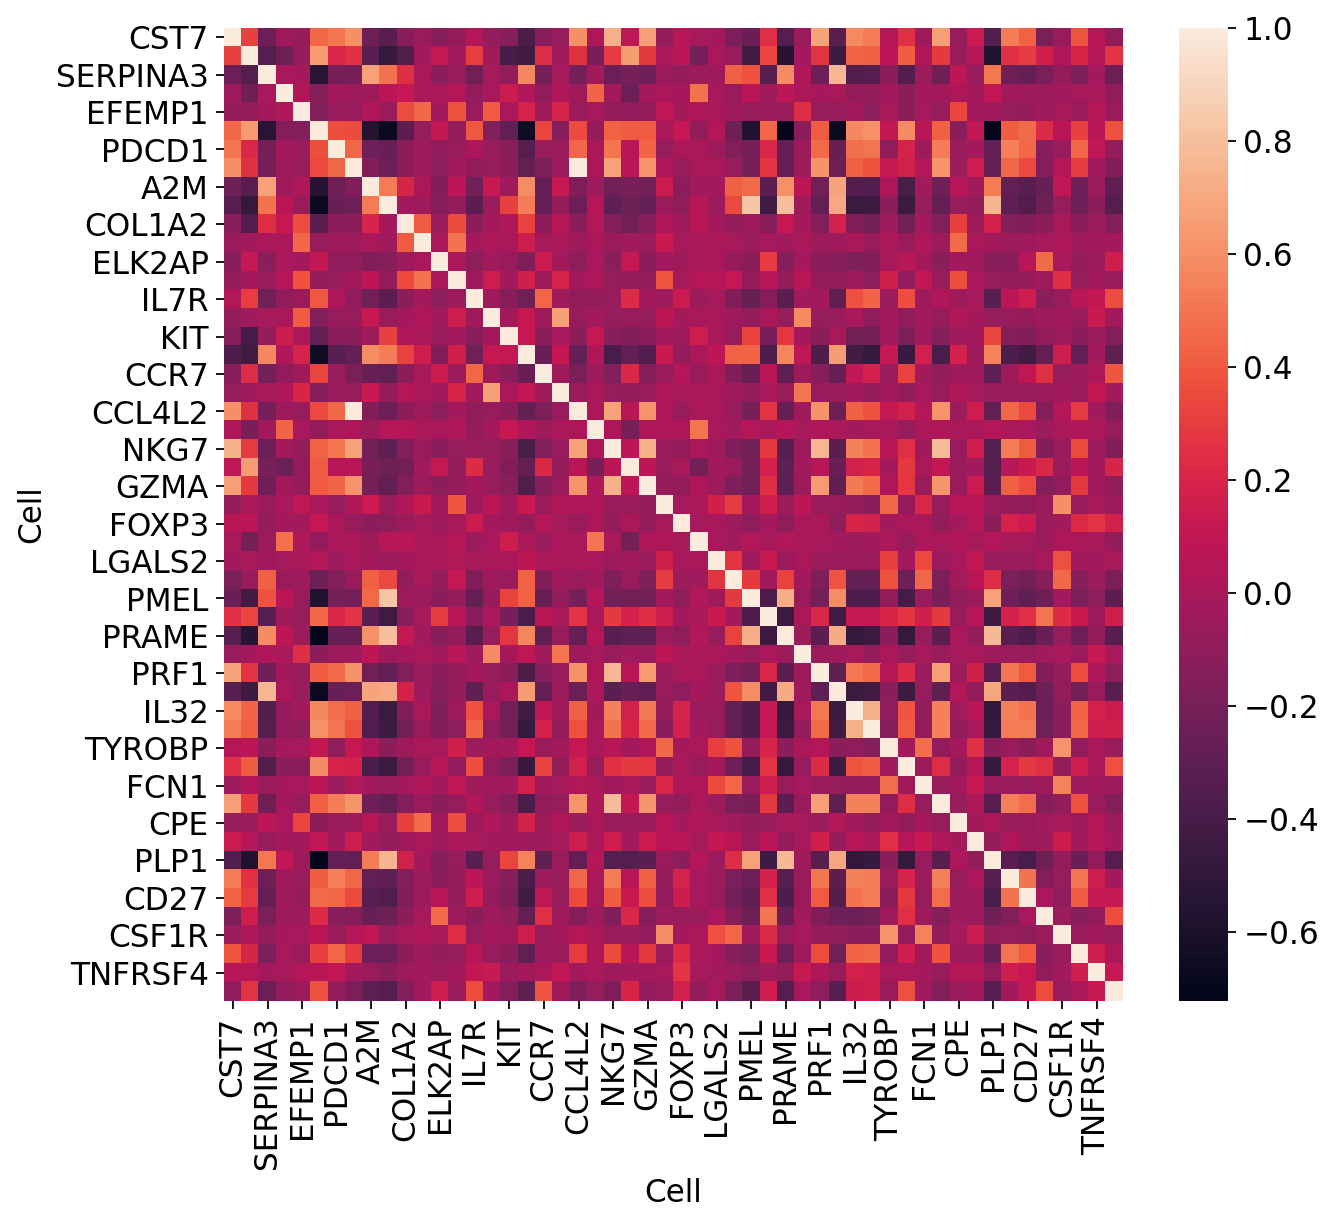

Text(0.5, 1.0, 'Distribution of correlations of \n selected markers')

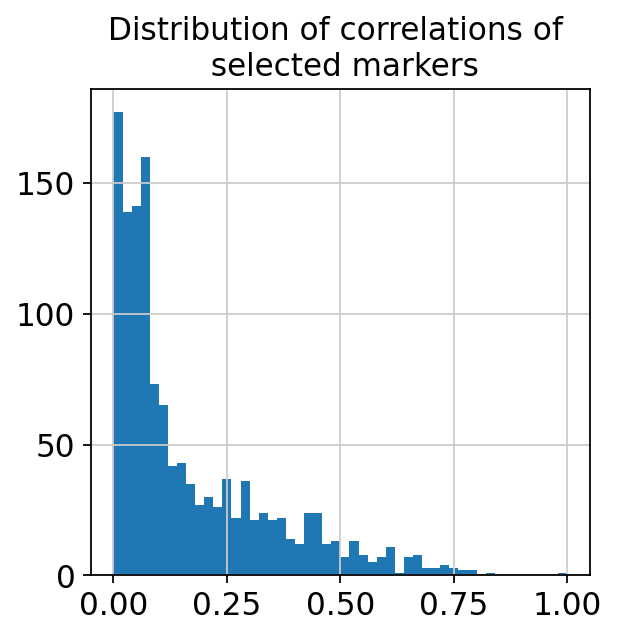

In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.DataFrame(new_adata.X, columns=new_adata.var.index)

corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(9, 8))
sn.heatmap(ax=ax, data=corrMatrix)
plt.show()

corr_matrix = corrMatrix.values
corr_matrix = np.abs(corr_matrix)

corr_values = []

for i in range(corr_matrix.shape[0]):
    for j in range(i):
        corr_values.append(corr_matrix[i, j])
        
plt.hist(corr_values, bins=50)
plt.title('Distribution of correlations of \n selected markers')